            percent
year               
1978-01-01     23.9
1979-01-01     21.6
1980-01-01     21.6
1981-01-01     22.0
1982-01-01     21.8


C:\Users\dell\AppData\Local\Temp\ipykernel_6908\574969347.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_acf(file4['percent'], lags =25).show()


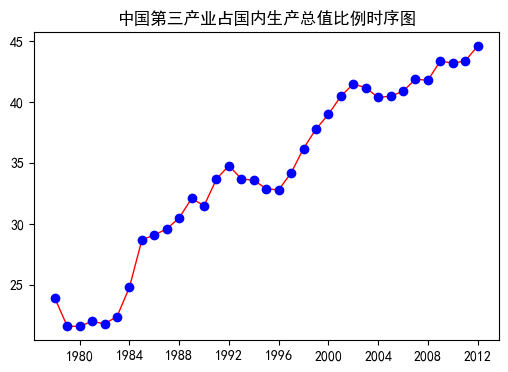

<Figure size 600x400 with 0 Axes>

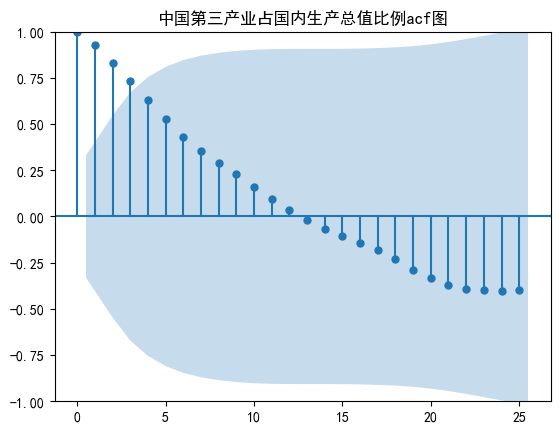

In [2]:
##例3
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
from matplotlib import rcParams  
# 设置字体为 SimHei（黑体）  
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体  
rcParams['axes.unicode_minus'] = False   # 解决负号显示问题 
#读入数据文件，指定时间标签，查看数据文件的基本结构
file4 = pd.read_excel('D:\\Ts\\A1_4.xlsx', parse_dates=True,index_col =0)
 #将索引转换为时间序列格式  
file4.index = pd.to_datetime(file4.index) 
percent = file4.to_period()
print(file4.head())
#时序图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签  
plt.figure(figsize=(6, 4))  # 设置图像大小  
plt.plot(file4.index, file4['percent'], color='red', marker='o', markerfacecolor='blue', markeredgecolor='blue', linewidth=1, linestyle='-')
plt.title('中国第三产业占国内生产总值比例时序图') 

#从 statsmodels . graphics . tsaplots 包中导入 plot _ acf 函数 ，
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(6, 4))  # 设置图像大小
plot_acf(file4['percent'], lags =25).show()
plt.title('中国第三产业占国内生产总值比例acf图') 
# 保存图像  
plt.savefig('example_2-1acf.png', dpi=300, bbox_inches='tight')  # 保存为 PNG 文件  
plt.show() 

In [ ]:
#例5续
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
#导入数据
file6 = pd.read_excel('D:\\Ts\\A1_6.xlsx', parse_dates=True,index_col =0).to_period()
# 进行 Dickey-Fuller 检验  
Suicide_df = adfuller(file6.Suicide,maxlag=2)


#从 statsmodels . graphics . tsaplots 包中导入 plot _ acf 函数 ，
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(6, 4))  # 设置图像大小
plot_acf(file6.Suicide, lags =25).show()
plt.title('suicide') 

#Suicide_df#淳朴输出
# 进行 Dickey-Fuller 检验，类型二（默认）  
Suicide_df = adfuller(file6.Suicide, maxlag=2)  
Suicide_df_c = pd.DataFrame(  
    {  
        'DF检验Type2': [  
            Suicide_df[0],  # 统计量  
            Suicide_df[1],  # P 值  
            Suicide_df[2],  # 延迟阶数  
            Suicide_df[3],  # 样本容量  
            Suicide_df[4]['1%'],  # 临界值 1%  
            Suicide_df[4]['5%'],  # 临界值 5%  
            Suicide_df[4]['10%'],  # 临界值 10%  
            Suicide_df[5],  # AIC  
        ]  
    },  
    index=['统计量', 'P 值', '延迟阶数', '样本容量', '临界值 1%', '临界值 5%', '临界值 10%', 'AIC']  
)  
# 进行 Dickey-Fuller 检验，类型一（无常数项）  
Suicide_df1 = adfuller(file6.Suicide, maxlag=1, regression="n")  
Suicide_df1_c = pd.DataFrame(  
    {  
        'DF检验Type1': [  
            Suicide_df1[0],  # 统计量  
            Suicide_df1[1],  # P 值  
            Suicide_df1[2],  # 延迟阶数  
            Suicide_df1[3],  # 样本容量  
            Suicide_df1[4]['1%'],  # 临界值 1%  
            Suicide_df1[4]['5%'],  # 临界值 5%  
            Suicide_df1[4]['10%'],  # 临界值 10%  
            Suicide_df1[5],  # AIC  
        ]  
    },  
    index=['统计量', 'P 值', '延迟阶数', '样本容量', '临界值 1%', '临界值 5%', '临界值 10%', 'AIC']  
)  

# 进行 Dickey-Fuller 检验，类型三（带趋势项）  
Suicide_df3 = adfuller(file6.Suicide, maxlag=2, regression="ct")  
Suicide_df3_c = pd.DataFrame(  
    {  
        'DF检验Type3': [  
            Suicide_df3[0],  # 统计量  
            Suicide_df3[1],  # P 值  
            Suicide_df3[2],  # 延迟阶数  
            Suicide_df3[3],  # 样本容量  
            Suicide_df3[4]['1%'],  # 临界值 1%  
            Suicide_df3[4]['5%'],  # 临界值 5%  
            Suicide_df3[4]['10%'],  # 临界值 10%  
            Suicide_df3[5],  # AIC  
        ]  
    },  
    index=['统计量', 'P 值', '延迟阶数', '样本容量', '临界值 1%', '临界值 5%', '临界值 10%', 'AIC']  
)  

# 显示三种类型的结果  
print("Dickey-Fuller 检验结果 - 类型二（默认）：")  
print(Suicide_df_c)  

print("\nDickey-Fuller 检验结果 - 类型一（无常数项）：")  
print(Suicide_df1_c)  

print("\nDickey-Fuller 检验结果 - 类型三（带趋势项）：")  
print(Suicide_df3_c)  

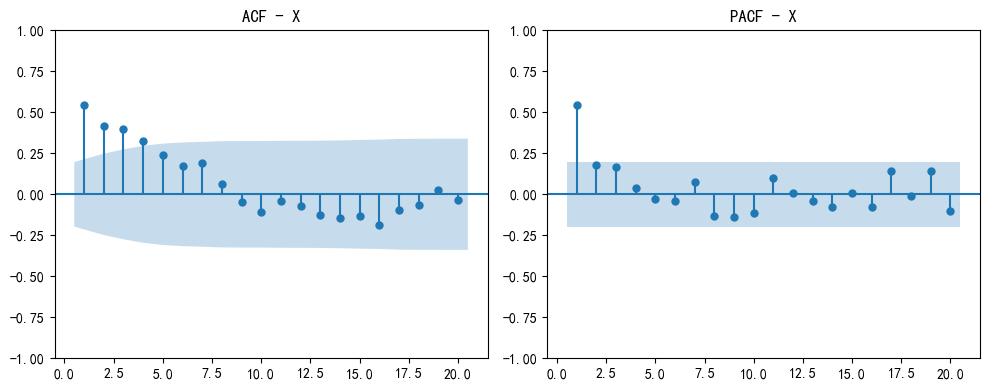

        ADF 检验
统计量  -3.183192
P值    0.020978
延迟阶数  2.000000
Ljung-Box Test Results:
      lb_stat     lb_pvalue
1   29.943381  4.448478e-08
2   48.030658  3.717707e-11
3   64.525720  6.335852e-14
4   75.577947  1.503715e-15
5   81.561057  3.955112e-16
6   84.734208  3.747332e-16
7   88.667157  2.322973e-16
8   89.078727  7.152316e-16
9   89.340121  2.208186e-15
10  90.619924  4.035237e-15
11  90.832677  1.144828e-14
12  91.433535  2.604457e-14
Ljung-Box Test Results of residual:
      lb_stat  lb_pvalue
1    0.935241   0.333505
2    1.152609   0.561971
3    3.784716   0.285669
4    4.865280   0.301402
5    5.193208   0.392759
6    5.204190   0.517904
7    8.155185   0.319109
8    8.160340   0.417967
9    8.480861   0.486505
10  10.130820   0.429092
11  10.576418   0.479400
12  10.576647   0.565505


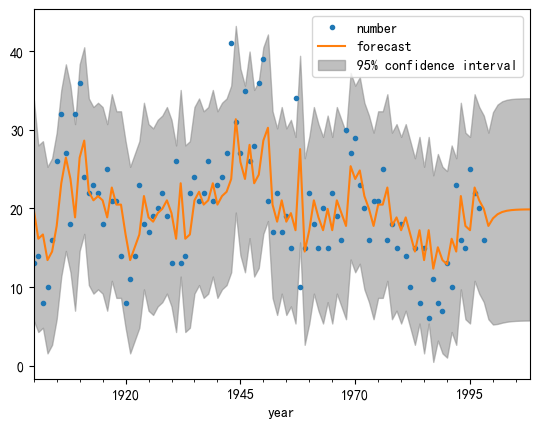

In [4]:
#例：1900—1998年全球7.0级以上地震发生次数序列
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from matplotlib import rcParams   
from statsmodels.graphics.tsaplots import plot_acf  # 导入 plot_acf 函数
from statsmodels.graphics.tsaplots import plot_pacf  # 导入 plot_pacf 函数
from statsmodels.stats.diagnostic import acorr_ljungbox  
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.api import SARIMAX 

# 自定义 ADF _ test 函数，简化 ADF 检验的输出信息，只输出检验统计量、 P 值和延迟阶数 
def ADF_test(x):
 ADF = pd.DataFrame(adfuller(x)[0:3],index =['统计量','P值','延迟阶数'], columns =['ADF 检验']) 
 return ADF 

#导入数据
file7 = pd.read_excel('D:\\Ts\\A1_7.xlsx', parse_dates=True,index_col =0).to_period()

# 绘制 序列的样本自相关图 和偏自相关系数 
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 创建 1x2 子图，调整图像大小  
plot_acf(file7['number'], zero=False, title="ACF - X", lags=20, ax=axes[0])  # 绘制 x 的 ACF 图 
plot_pacf(file7['number'], zero=False, title="PACF - X", lags=20, ax=axes[1])  # 绘制 x 的 PACF 图

# #调整布局并显示图像  
plt.tight_layout()  
#plt.show()  

## 保存图像  
plt.savefig('example_-1acf.png', dpi=300, bbox_inches='tight')  # 保存为 PNG 文件  
plt.show() 

# 调用自定义 ADF_test 函数对 number 序列做 ADF 检验  
result = ADF_test(file7['number'])  

# 打印结果  
print(result) 

# 计算 Ljung-Box 统计量（Q_LB）和 p 值  
# 设置滞后阶数为 1 到 12  
lags = 12  
ljung_box_result = acorr_ljungbox(file7['number'], lags=lags, return_df=True)  

# 打印结果  
print("Ljung-Box Test Results:")  
print(ljung_box_result)  

#指定模型阶数
model=SARIMAX(file7['number'], order=(1,0,0),trend="c")
model_fit=model.fit()
model_fit.summary()

#对残差序列进行纯随机性检验
#LB_test(model_fit.resid,20),#书上命令不能运行
# 设置滞后阶数为 1 到20  
lags = 12  
ljung_box_result_resid = acorr_ljungbox(model_fit.resid,lags=lags, return_df=True) 
# 打印结果  
print("Ljung-Box Test Results of residual:")  
print(ljung_box_result_resid) 

#调用 get forecast 函数，做10期预测，预测值存放在 number_fore 中
number_fore=model_fit.get_forecast(10)
#输出预测结果
number_fore.summary_frame()

#plot_predict函数画拟合预测图
from statsmodels.graphics.tsaplots import plot_predict
fig,ax = plt.subplots()
fig=file7['number'].plot(marker="." ,linestyle="none")

fig = plot_predict(model_fit,start="1900", end="2008",ax=ax)
legend = ax.legend(loc="upper right")

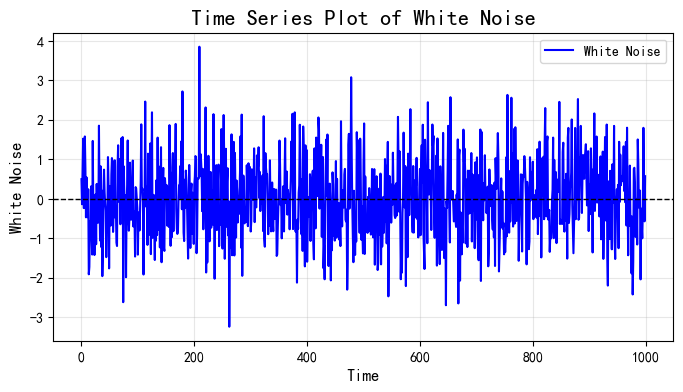

C:\Users\dell\AppData\Local\Temp\ipykernel_6908\3898781080.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_acf(white_noise).show()


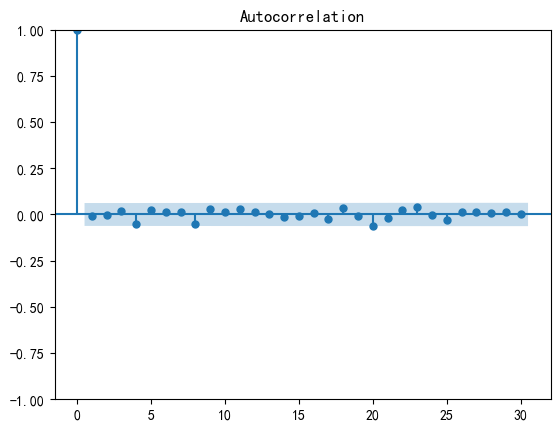

Ljung-Box Test Results:
     lb_stat  lb_pvalue
1   0.056085   0.812794
2   0.056139   0.972321
3   0.318984   0.956419
4   3.277853   0.512449
5   3.949039   0.556776
6   4.155995   0.655575
7   4.307473   0.743759
8   6.739585   0.564972
9   7.497028   0.585516
10  7.710808   0.657061
11  8.664430   0.652836
12  8.865321   0.714389


In [5]:
#例 白噪声时序分析
import numpy as np  
import matplotlib.pyplot as plt  
from statsmodels.stats.diagnostic import acorr_ljungbox  
# 生成 1000 个服从标准正态分布的白噪声序列  
np.random.seed(42)  # 设置随机种子，保证结果可重复  
white_noise = np.random.normal(loc=0, scale=1, size=1000)  # 均值为 0，标准差为 1  

# 绘制时序图  
plt.figure(figsize=(8, 4))  # 设置图像大小  
plt.plot(white_noise, color='blue', label='White Noise')  
plt.title('Time Series Plot of White Noise', fontsize=16)  # 设置标题  
plt.xlabel('Time', fontsize=12)  # 设置 X 轴标签  
plt.ylabel('White Noise', fontsize=12)  # 设置 Y 轴标签  
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # 添加水平线 y=0  
plt.legend()  # 添加图例  
plt.grid(alpha=0.3)  # 添加网格  
plt.show() 

#ACF图
plot_acf(white_noise).show()

# 保存图像  
plt.savefig('example_2-4acf.png', dpi=300, bbox_inches='tight')  # 保存为 PNG 文件  
plt.show() 

# 计算 Ljung-Box 统计量（Q_LB）和 p 值  
# 设置滞后阶数为 1 到 12  
lags = 12  
ljung_box_result = acorr_ljungbox(white_noise, lags=lags, return_df=True)  

# 打印结果  
print("Ljung-Box Test Results:")  
print(ljung_box_result)  
